In [53]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyproj 
import pandas as pd 

In [54]:
#import bands as separate 1 band raster
band4 = rasterio.open('B4.TIF') #red
band5 = rasterio.open('B5.TIF') #nir

In [55]:
#number of raster rows
band4.height

255

In [56]:
#number of raster columns
band4.width

467

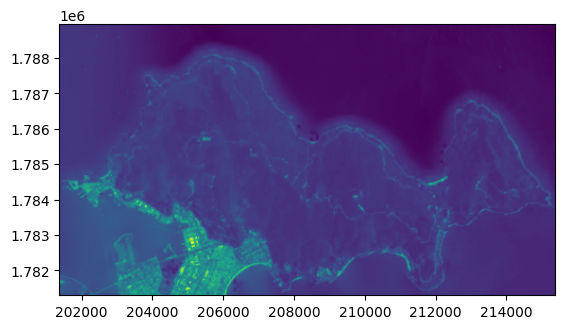

<Axes: >

In [57]:
#plot band 
plot.show(band4)

In [58]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [59]:
#raster system of reference
band4.crs

CRS.from_epsg(32649)

In [60]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 201375.0,
       0.0, -30.0, 1788945.0)

In [61]:
#show lon and lat coordinates with epsg(32649)
height, width = band4.shape
lon1, lat1 = band4.transform * (0, 0)
lon2, lat2 = band4.transform * (width, height)
    
print("Size: {} rows x {} columns".format(height, width))
print("Fist (lon, lat): ({}, {})".format(lon1, lat1))
print("Last (lon, lat): ({}, {})".format(lon2, lat2))

Size: 255 rows x 467 columns
Fist (lon, lat): (201375.0, 1788945.0)
Last (lon, lat): (215385.0, 1781295.0)


In [62]:
#raster values as matrix array
band4.read(1)

array([[8624, 8608, 8613, ..., 7245, 7237, 7235],
       [8620, 8607, 8602, ..., 7242, 7253, 7256],
       [8619, 8605, 8599, ..., 7239, 7270, 7254],
       ...,
       [9669, 9674, 9647, ..., 8256, 8240, 8219],
       [9672, 9662, 9657, ..., 8255, 8227, 8257],
       [9657, 9644, 9647, ..., 8232, 8233, 8242]], dtype=uint16)

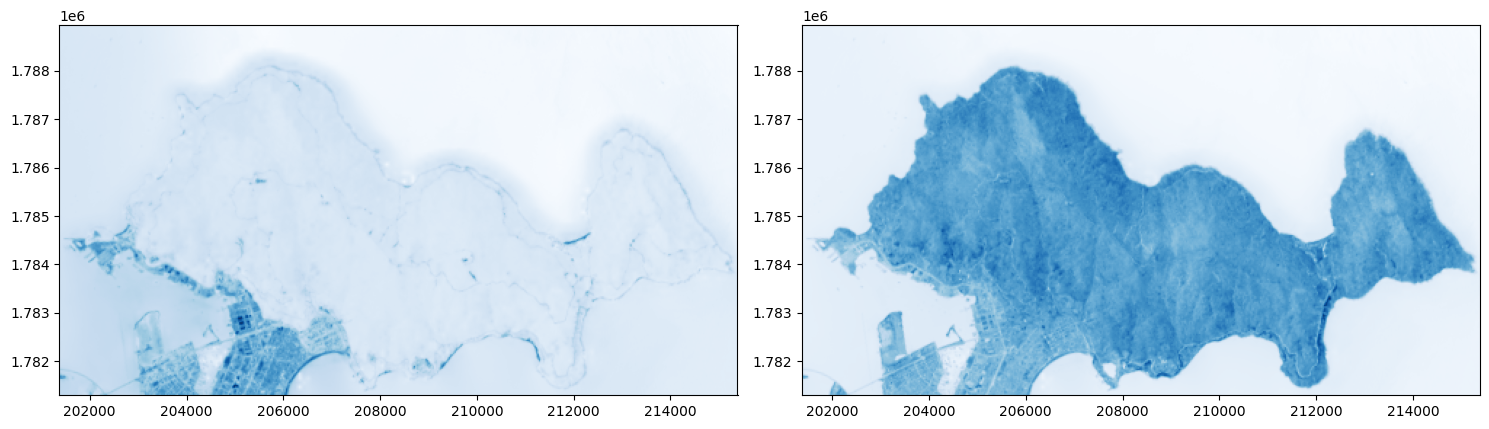

In [63]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [64]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[8441., 8411., 8398., ..., 7249., 7245., 7243.],
       [8425., 8409., 8382., ..., 7238., 7262., 7263.],
       [8413., 8404., 8392., ..., 7238., 7264., 7279.],
       ...,
       [9219., 9221., 9221., ..., 8159., 8150., 8155.],
       [9226., 9207., 9205., ..., 8145., 8138., 8219.],
       [9214., 9209., 9204., ..., 8175., 8141., 8185.]])

In [65]:
red

array([[8624., 8608., 8613., ..., 7245., 7237., 7235.],
       [8620., 8607., 8602., ..., 7242., 7253., 7256.],
       [8619., 8605., 8599., ..., 7239., 7270., 7254.],
       ...,
       [9669., 9674., 9647., ..., 8256., 8240., 8219.],
       [9672., 9662., 9657., ..., 8255., 8227., 8257.],
       [9657., 9644., 9647., ..., 8232., 8233., 8242.]])

In [66]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:10,:10]

array([[-0.0107237 , -0.0115753 , -0.01263888, -0.01093474, -0.00904074,
        -0.01111046, -0.01051025, -0.01068451, -0.0097475 , -0.01093217],
       [-0.01144031, -0.01163611, -0.01295337, -0.01163884, -0.00985106,
        -0.01015914, -0.01138899, -0.01032985, -0.01021726, -0.0100606 ],
       [-0.01209488, -0.01181727, -0.01218292, -0.0124457 , -0.01106234,
        -0.01145644, -0.0113456 , -0.0100358 , -0.01085872, -0.01177718],
       [-0.01198731, -0.01217289, -0.01095148, -0.01050901, -0.01041423,
        -0.01126761, -0.01179785, -0.0093414 , -0.00873234, -0.01055113],
       [-0.01251984, -0.01244424, -0.01146452, -0.01262997, -0.01020887,
        -0.01002286, -0.01215716, -0.01161972, -0.00992192, -0.01223385],
       [-0.01215003, -0.01201994, -0.01103027, -0.0117495 , -0.01071993,
        -0.01055347, -0.01239791, -0.01162518, -0.0107489 , -0.01130077],
       [-0.01233263, -0.01207361, -0.01248754, -0.01220514, -0.01073125,
        -0.01126893, -0.01180894, -0.0110909 

In [67]:
#export ndvi image
ndviImage = rasterio.open('ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

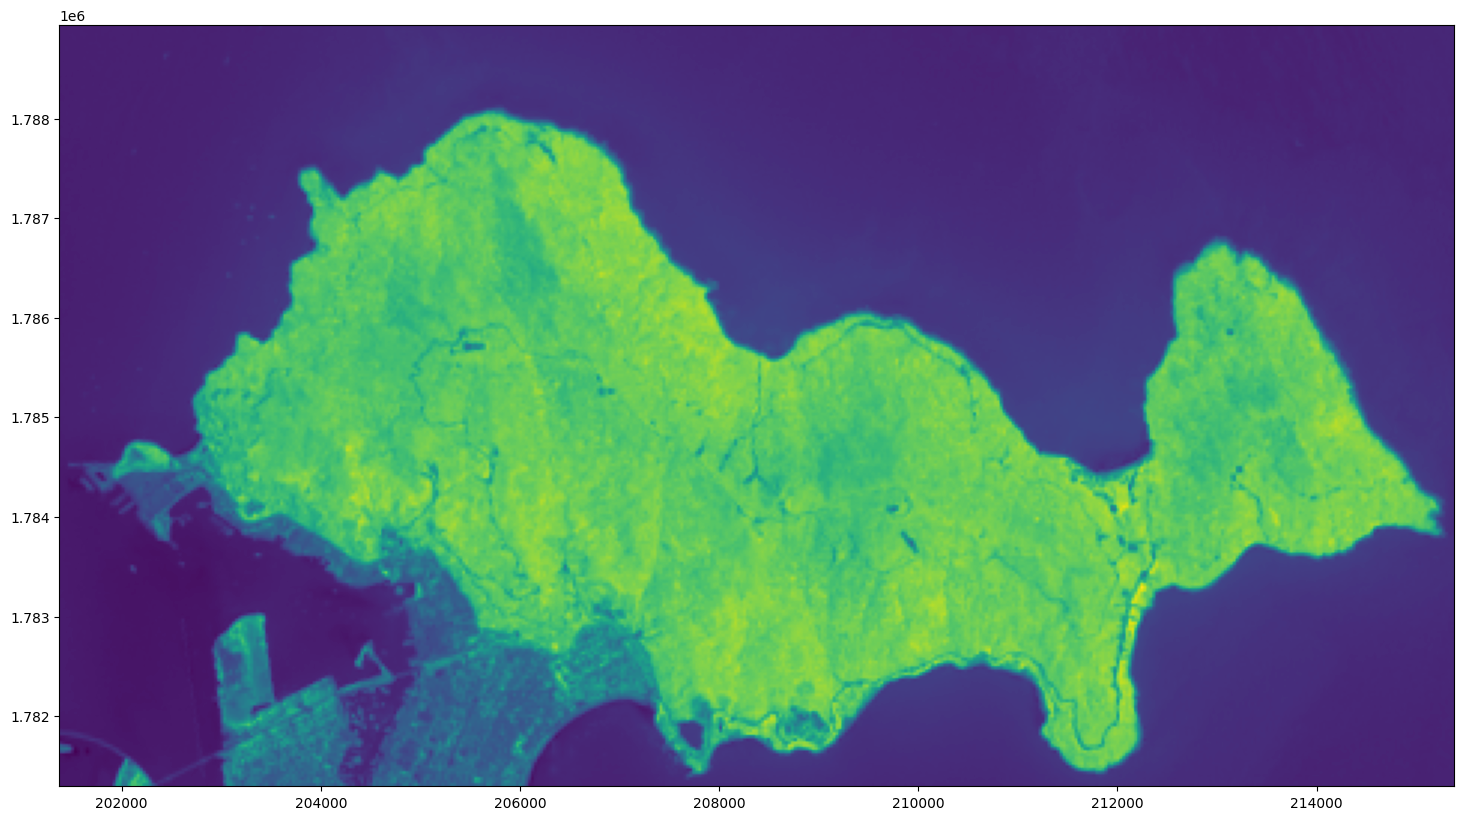

<Axes: >

In [68]:
# plot ndvi
ndvi = rasterio.open('ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)


In [69]:
# # Open the NDVI image
# ndvi = rasterio.open('ndviImage.tiff')

# # Plot the NDVI image
# fig, ax = plt.subplots(figsize=(24, 10))
# im = ax.imshow(ndvi.read(1), cmap='YlGn')  # Choose an appropriate colormap

# # Add a color bar
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label('NDVI Value', rotation=270, labelpad=30)

# plt.show()

In [70]:
with rasterio.open('ndviImage.tiff') as src:
    transform = src.transform
    
    src_crs = src.crs
    
    height, width = src.shape

    data = src.read(1)
    
target_crs = pyproj.CRS("EPSG:4326")

# epsg(32649) to EPSG 4326
transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)

lon1, lat1 = transformer.transform(*transform * (0, 0))
lon2, lat2 = transformer.transform(*transform * (width, height))

(lon1, lat1), (lon2, lat2)

((108.20756335896627, 16.162570625413274),
 (108.33938885247932, 16.095164778635564))

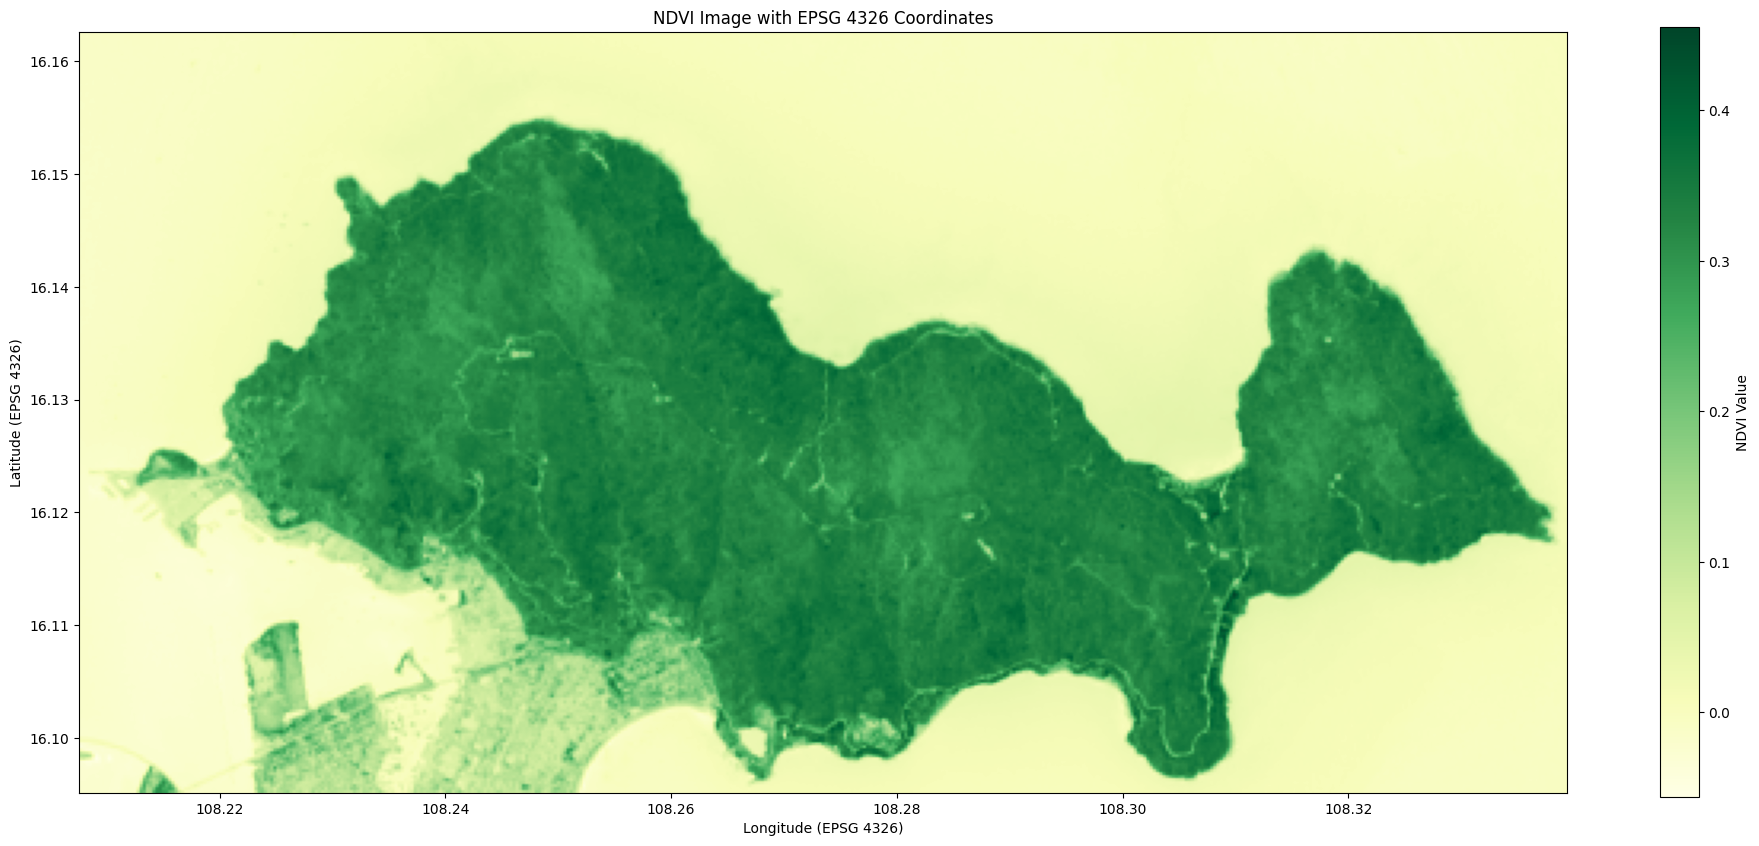

In [71]:
fig, ax = plt.subplots(figsize=(24, 10))
im = ax.imshow(data, extent=(lon1, lon2, lat2, lat1), cmap='YlGn', origin='upper')
plt.colorbar(im, ax=ax, label='NDVI Value')

ax.set_xlabel('Longitude (EPSG 4326)')
ax.set_ylabel('Latitude (EPSG 4326)')
plt.title('NDVI Image with EPSG 4326 Coordinates')

plt.show()


<!-- Nguyên Trầm cảm -->

In [72]:
im.get_array()


masked_array(
  data=[[-1.07237035e-02, -1.15752982e-02, -1.26388807e-02, ...,
          2.75976266e-04,  5.52409888e-04,  5.52562509e-04],
        [-1.14403051e-02, -1.16361072e-02, -1.29533679e-02, ...,
         -2.76243094e-04,  6.20048226e-04,  4.82126868e-04],
        [-1.20948802e-02, -1.18172732e-02, -1.21829204e-02, ...,
         -6.90750846e-05, -4.12825100e-04,  1.72022294e-03],
        ...,
        [-2.38246506e-02, -2.39745965e-02, -2.25779097e-02, ...,
         -5.90922936e-03, -5.49115314e-03, -3.90863564e-03],
        [-2.36003810e-02, -2.41136255e-02, -2.39635245e-02, ...,
         -6.70731707e-03, -5.43843569e-03, -2.30638504e-03],
        [-2.34751735e-02, -2.30732509e-02, -2.35000796e-02, ...,
         -3.47412690e-03, -5.61866374e-03, -3.46989712e-03]],
  mask=False,
  fill_value=1e+20)

In [73]:
im_array = im.get_array()
num_rows = 255
num_cols = 467

start_lat = 16.162570625413274
end_lat = 16.095164778635564

start_lon = 108.20756335896627
end_lon = 108.33938885247932

lat_values = np.linspace(start_lat, end_lat, num_rows)
lon_values = np.linspace(start_lon, end_lon, num_cols)

# create DataFrame
df = pd.DataFrame(data=im_array, index=lat_values, columns=lon_values)

csv_file_path = 'image_data.csv'
df.to_csv(csv_file_path, index=True)
df 

,108.207563,108.207846,108.208129,108.208412,108.208695,108.208978,108.209261,108.209544,108.209826,108.210109,...,108.336843,108.337126,108.337409,108.337692,108.337974,108.338257,108.338540,108.338823,108.339106,108.339389
16.162571,-0.010724,-0.011575,-0.012639,-0.010935,-0.009041,-0.011110,-0.010510,-0.010685,-0.009748,-0.010932,...,-0.001512,-0.001927,-0.001031,-0.001372,-0.000757,-0.000690,-0.001104,0.000276,0.000552,0.000553
16.162305,-0.011440,-0.011636,-0.012953,-0.011639,-0.009851,-0.010159,-0.011389,-0.010330,-0.010217,-0.010061,...,-0.000755,-0.001443,-0.001032,-0.001307,-0.001033,-0.000551,-0.000899,-0.000276,0.000620,0.000482
16.162040,-0.012095,-0.011817,-0.012183,-0.012446,-0.011062,-0.011456,-0.011346,-0.010036,-0.010859,-0.011777,...,-0.000687,-0.001236,-0.002344,0.000069,-0.000413,0.000000,-0.001803,-0.000069,-0.000413,0.001720
16.161774,-0.011987,-0.012173,-0.010951,-0.010509,-0.010414,-0.011268,-0.011798,-0.009341,-0.008732,-0.010551,...,-0.000826,-0.001239,-0.002210,-0.001310,-0.000758,0.000551,-0.000483,-0.000483,-0.000620,0.000962
16.161509,-0.012520,-0.012444,-0.011465,-0.012630,-0.010209,-0.010023,-0.012157,-0.011620,-0.009922,-0.012234,...,-0.000344,-0.000551,-0.002071,-0.001450,-0.001726,-0.000551,0.000137,-0.000552,0.000689,0.000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.096226,-0.025254,-0.025034,-0.024383,-0.023892,-0.023498,-0.024232,-0.024095,-0.022452,-0.022819,-0.024036,...,-0.008835,-0.006312,-0.007697,-0.005189,-0.006525,-0.004446,-0.005819,-0.005624,-0.004879,-0.004638
16.095961,-0.024143,-0.024328,-0.024112,-0.024398,-0.023278,-0.023310,-0.023548,-0.021969,-0.023534,-0.024234,...,-0.008343,-0.008046,-0.007535,-0.006667,-0.006166,-0.005062,-0.005694,-0.005630,-0.006029,-0.005862
16.095696,-0.023825,-0.023975,-0.022578,-0.023746,-0.023073,-0.024315,-0.023407,-0.022467,-0.024315,-0.024502,...,-0.008038,-0.007422,-0.007049,-0.006100,-0.006180,-0.006151,-0.005696,-0.005909,-0.005491,-0.003909
16.095430,-0.023600,-0.024114,-0.023964,-0.023529,-0.024214,-0.023115,-0.023261,-0.022834,-0.023415,-0.024593,...,-0.006371,-0.007167,-0.007358,-0.006913,-0.006185,-0.005353,-0.005872,-0.006707,-0.005438,-0.002306
